In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 머신러닝

1. supervised learning(지도학습) : 예측 대상이 존재
    - classification(분류분석) : 불연속적인 값을 예측/분류
    -  regression(회귀분석) : 연속적인 값을 예
2. 2. unsupervised learning(비지도학습) : 예측대상이 존재하지
   -   - clustering(군집분석) : 군집을 만드는 알고리즘

 Graduation rate

# KMeans

In [6]:
df = pd.read_csv('C:\\Users\\M\\Machine_L\\data\\College_Data')
df.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [7]:
cluster = df.Private
cluster.head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Private, dtype: object

In [8]:
df.drop(columns = ['Unnamed: 0', 'Private'], inplace = True)
df.head(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [9]:
# 미국 대학교 데이터를 기반으로 2개의 cluster로 묶어라..

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2) # cluster의 수 : 하이퍼파라미터
km.fit(df)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [12]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
unv_pri_label = (cluster == 'No').astype(int)

In [17]:
np.mean(km.labels_ == unv_pri_label)

0.7786357786357786

In [18]:
#대학교의 특성을 통해서 kmeans가 두 개의 그룹으로 묶은 결과가 사립, 공립의 구분과 유사함을 확인
#kmeans가 대학교의 특성을 잘 반영해서 묶는다

In [19]:
from sklearn.datasets import make_blobs  # 그룹화된 데이터를 생성해주는 함수

x, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=1.5, shuffle=True, random_state=50)

In [20]:
x[:5]

array([[-5.74143926, -3.67713944],
       [-2.86762568, 10.95406344],
       [-2.81564733, 10.54292096],
       [-5.09549551, -4.43733113],
       [-0.08689243, 12.54210715]])

In [21]:
y[:10]

array([1, 2, 2, 1, 2, 0, 2, 1, 2, 0])

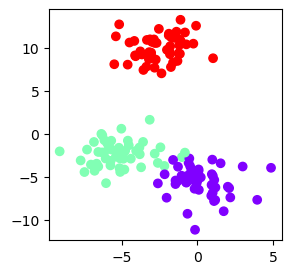

In [22]:
plt.figure(figsize=(3,3))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow')

In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            max_iter=300,
           init = 'random',
           random_state = 2024)

y_km = km.fit_predict(x)
y_km

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0,
       2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1,
       0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2,
       2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 2, 1,
       0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [28]:
km.cluster_centers_ #center 좌표값을 뽑아서 거리 게산을 한다.

array([[-5.40379519, -2.29277406],
       [-2.48154222,  9.98768106],
       [ 0.11385687, -5.38938416]])

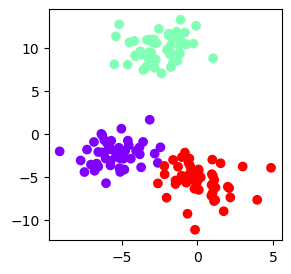

In [32]:
#시각화
plt.figure(figsize=(3,3))
plt.scatter(x[:, 0], x[:, 1], c=y_km, cmap='rainbow')

### cluster 평가
- 절대적인 평가지표는 없다
- 간접적인 평가지표 : inertia_, silhouette

### 1. inertia_
- 군집 내의 데이터들 간의 거리

### 2. silhouette
- 군집 내 데이터간의 거리(a)
- 군집 간의 데이터들의 거리(b)
- silhouette = (b-a) / max(a,b)
- inertia_ 보다 silhousette을 더 신뢰도 높은 지표로 간주

In [34]:
km.inertia_

661.1447774013328

In [35]:
distortion = []

for i in range(1, 11):
  km = KMeans(n_clusters=i,
              max_iter=300,
              init='k-means++',
              random_state=111)
  km.fit(x)
  distortion.append(km.inertia_)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


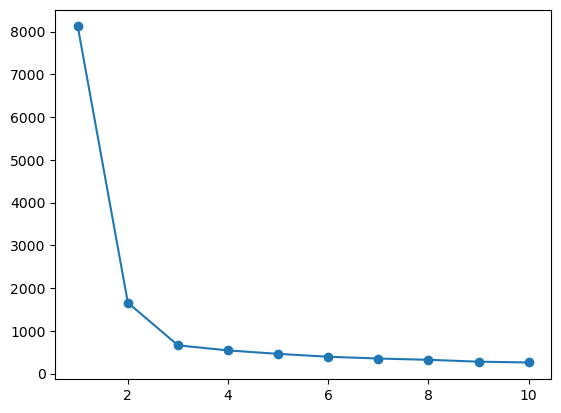

In [36]:
plt.plot(range(1,11), distortion, marker='o')
plt.show()

### silhouette

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score
km = KMeans(n_clusters = 3,
            init='k-means++',
            random_state=111)
y_km = km.fit_predict(x)

silhouette_vals = silhouette_samples(x, y_km, metric='euclidean') #유클리디안 거리 사용

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
silhouette_vals #데이터 별로 값이 나온다.

array([0.65110537, 0.84826221, 0.85396669, 0.5107438 , 0.7584568 ,
       0.64758898, 0.82366404, 0.64728297, 0.8335225 , 0.47928506,
       0.78025726, 0.52852575, 0.61984089, 0.65770082, 0.64903788,
       0.85085548, 0.7209254 , 0.64869693, 0.83434951, 0.54557797,
       0.77580982, 0.689637  , 0.66302135, 0.84252179, 0.69324094,
       0.80528222, 0.85012804, 0.81819779, 0.72904191, 0.27733091,
       0.8391562 , 0.55143666, 0.67174608, 0.62660519, 0.71557588,
       0.68025222, 0.54854469, 0.69943676, 0.660524  , 0.55472947,
       0.29248046, 0.71582589, 0.84821105, 0.57197727, 0.83631315,
       0.63967688, 0.62537201, 0.63193704, 0.43491262, 0.69278029,
       0.83325747, 0.67283311, 0.78304268, 0.67243379, 0.67608315,
       0.83551016, 0.69165602, 0.57405334, 0.59118804, 0.60923646,
       0.63203607, 0.70077295, 0.62631572, 0.81570925, 0.5244489 ,
       0.65747083, 0.64297018, 0.83839279, 0.48391873, 0.79765903,
       0.736437  , 0.73601117, 0.81857615, 0.82983294, 0.77129

### silhouette 값 평가하는 방법
1. 시각화를 통해서 cluster별로 silhouette 값의 분포를 비교
2. silhouette값의 평균값을 계산 - 전체 데이터의 silhouette값들의 평균이 클수록 좋다.

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.717253687347684


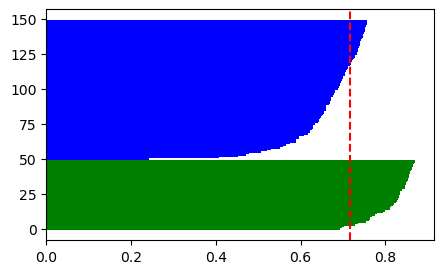

In [55]:
# 있는 코드 그냥 복붙해서 사용
km = KMeans(n_clusters = 2,
            init='k-means++',
            random_state=111) #군집 3개로 결정
y_km = km.fit_predict(x) #
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean') #실루엣 값

plt.figure(figsize=(5,3))
y_ax_lower, y_ax_upper= 0, 0  # horizontal bar chart의 하한선, 상한선(y축)
cluster_labels = np.unique(y_km)  # 군집의 라벨 : 0, 1, 2
n_clusters = cluster_labels.shape[0]  # 라벨의 숫자

clist = ['g', 'b', 'y', 'orange']  # 칼러 리스트

for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]  # boolean index으로 특정 군집의 silhouette score만 추출
  c_silhouette_vals.sort()  # 특정 군집내 데이터의 silhouette score를 올림차순 정렬
  y_ax_upper += len(c_silhouette_vals)  # bar chart 의 상한선을 설정 - 데이터  수만큼 반복적으로 업데이트
  
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,  # 수평 bar chart, 높이는 1, color는 clist에서
           edgecolor='none', color=clist[i])
  y_ax_lower += len(c_silhouette_vals)  # 다음 bar chart의 하한은 이전 bar chart의 상한으로 설정

silhouette_avg = np.mean(silhouette_vals)  # 모든 데이터의 silhouette score 평균
plt.axvline(silhouette_avg, color='red', linestyle='--')  # 수직선 그래프
print(silhouette_avg)

plt.show()

In [56]:
#클러스터 개수별 실루엣계수 그래프

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


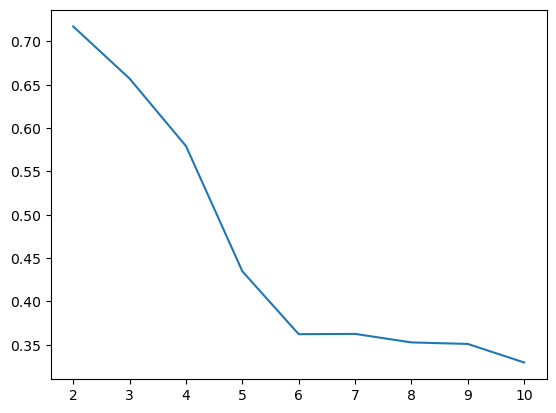

In [57]:
silhouette_list = []

for i in range(2, 11):
  km = KMeans(n_clusters=i,
              init='k-means++',
              max_iter=300,
              random_state=10)

  y_km = km.fit_predict(x)

  silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')  # 모든 데이터의 silhouette scores
  silhouette_avg = np.mean(silhouette_vals) # # 모든 데이터의 silhouette scores의 전체 평균
  silhouette_list.append(silhouette_avg)

plt.plot(range(2,11), silhouette_list)

# cluster의 수를 3으로 지정하면 가장 높은 silhouette score를 확인할 수 있다..

In [58]:
#다른예제

In [61]:
x, y = make_blobs(n_samples=300, n_features=2, centers=5, cluster_std=1, shuffle=True, random_state=50)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


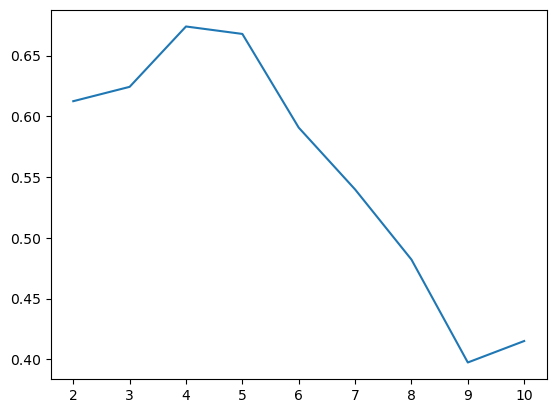

In [62]:
silhouette_list = []

for i in range(2, 11):
  km = KMeans(n_clusters=i,
              init='k-means++',
              max_iter=300,
              random_state=10)

  y_km = km.fit_predict(x)

  silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')  # 모든 데이터의 silhouette scores
  silhouette_avg = np.mean(silhouette_vals) # # 모든 데이터의 silhouette scores의 전체 평균
  silhouette_list.append(silhouette_avg)

plt.plot(range(2,11), silhouette_list)

# cluster의 수를 3으로 지정하면 가장 높은 silhouette score를 확인할 수 있다..

## 계층적 군집분석

- 데이터는 차원 공간 상의 점으로 존재.
- 모든 데이터간의 거리를 계산한다..
- 가장 가까운 데이터(점)을 하나의 그룹(점)으로 묶는다
- 그룹이 점점 커진다
- 나중에는 모든 데이터(점)이 하나의 그룹으로 묶인다.
- 클러스터링을 멈춘다.

- 하나의 점(데이터)에서 점점 큰 그룹으로 형성이 되어가므로 계층적 군집
점진적으로 그룹이 형성됨

In [68]:
!pip install mglearn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
    --------------------------------------- 10.2/581.4 kB ? eta -:--:--
   ---- ---------------------------------- 61.4/581.4 kB 544.7 kB/s eta 0:00:01
   ---------------------------------------  573.4/581.4 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 581.4/581.4 kB 4.1 MB/s eta 0:00:00


In [70]:
import mglearn

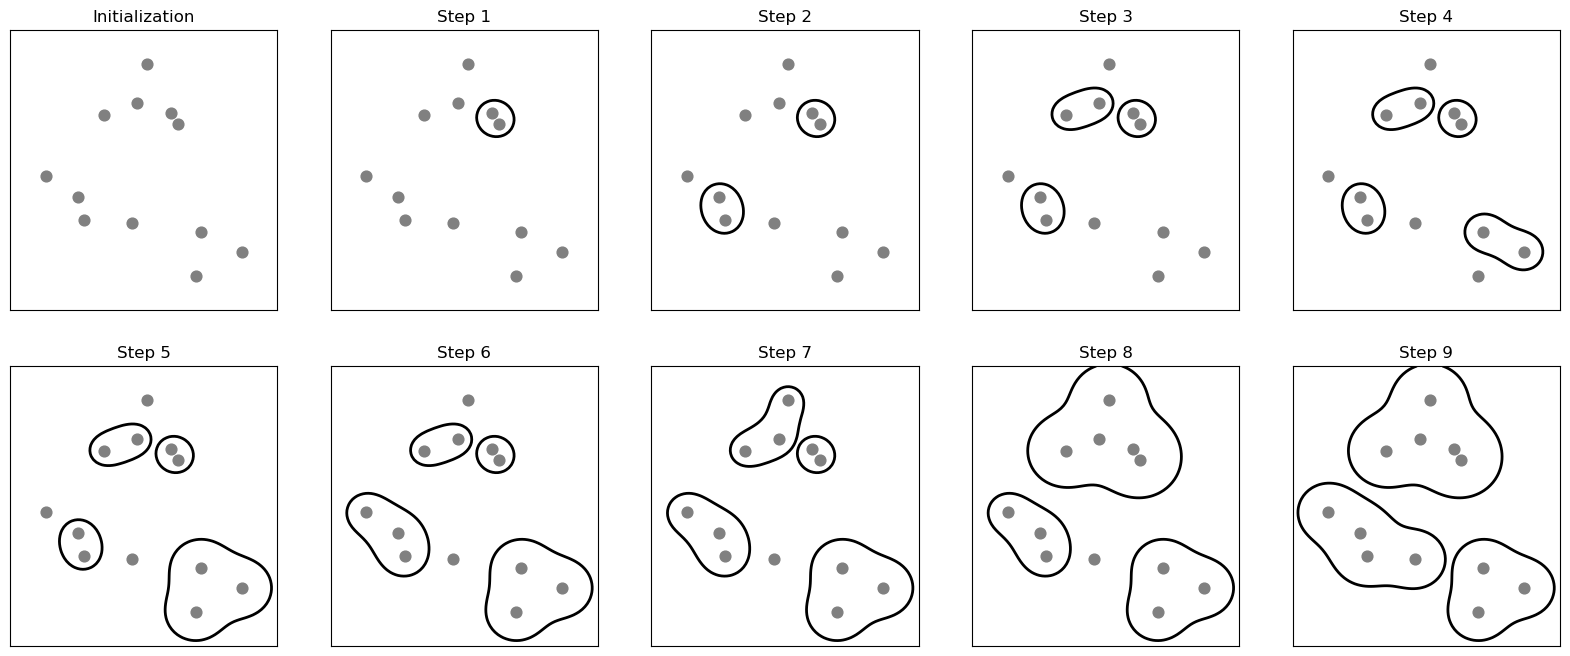

In [71]:
mglearn.plots.plot_agglomerative_algorithm()

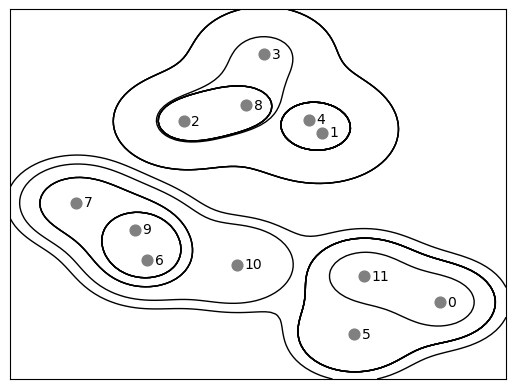

In [72]:
mglearn.plots.plot_agglomerative()

In [73]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [75]:
# 데이터 생성
X, y = make_blobs(random_state=1)

In [76]:
#모델 학습
agg = AgglomerativeClustering(n_clusters = 3)
assign = agg.fit_predict(X)
assign

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int64)

In [77]:
#dendrogram 그리기

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_array = ward(X)
row_dendr = dendrogram(linkage_array, labels = y)

plt.tight_layout()


### 밀도기반 클러스터링(DBSCAN)
- 밀도를 중심으로 밀도가 이어지는 구간을 하나의 클러스터로 묶는다
- 밀도의 평가기준 :특정한 점(데이터)를 중심으로 일정한 반지름(e)내에 일정한 수(MinPts) 이상의 점이 있으면 중심점이라고 하고, 밀도가 높은 구간으로 간주한다.
- 중심점 : 군집 중앙에 있는 점
- 경계점 : 자신은 중심점이 아니지만, 다른 중심점의 밀도 구간 내에 포함된 점.
- 잡음점 : 중심점도 경계점도 아닌 밀도 구간에서 벗어난 점.
- 밀도가 높은 구간(밀도구간)을 연결해서 하나의 cluster로 묶는다.

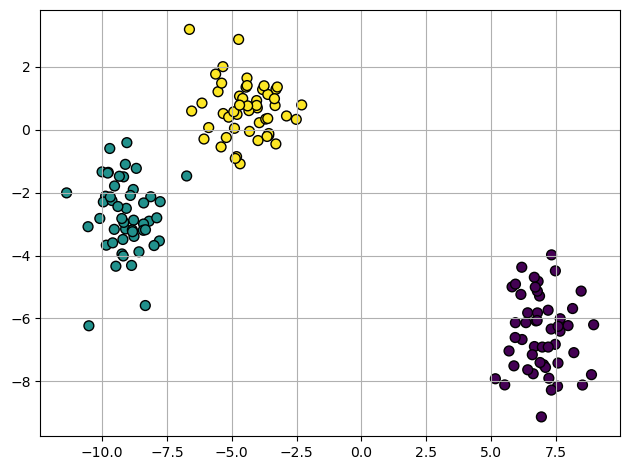

In [79]:
#데이터 생성
X,y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=1, shuffle=True, random_state=15)

plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [84]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

#Kmeans
km = KMeans(n_clusters =3, max_iter=300, random_state = 2024)
y_km = km.fit_predict(X)

#dbscan 
db = DBSCAN(eps = 1, min_samples = 3, metric = 'euclidean')
y_db =  db.fit_predict(X)

#agg
agg = AgglomerativeClustering(n_clusters =3)
y_agg =  agg.fit_predict(X)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [87]:
print('Kmeans', np.mean(silhouette_samples(X, y_km, metric='euclidean')))
print('dbscan', np.mean(silhouette_samples(X, y_db, metric='euclidean')))
print('agg', np.mean(silhouette_samples(X, y_agg, metric='euclidean')))

Kmeans 0.7578723661002286
dbscan 0.6966285567045662
agg 0.7578723661002286


<hr>

# 새로운 데이터 셋 
make_mooons

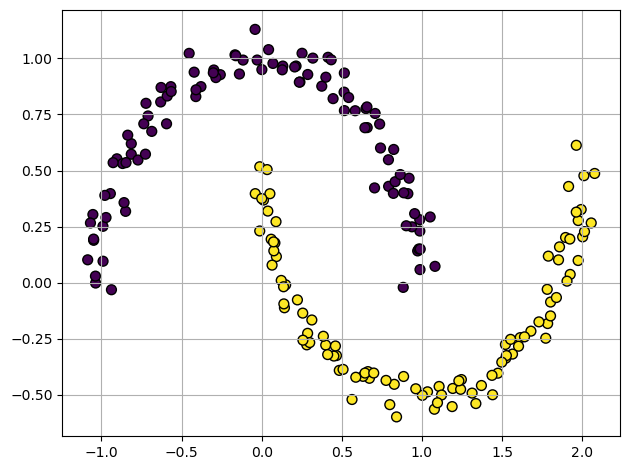

In [90]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 2024)

plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [95]:
# 평가
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

km = KMeans(n_clusters=2, max_iter=300, random_state=10)
y_km = km.fit_predict(X)

db = DBSCAN(eps = 0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

agg = AgglomerativeClustering(n_clusters=2)
y_agg = agg.fit_predict(X)

C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [96]:
print(np.mean(silhouette_samples(X, y_km, metric='euclidean')))
print(np.mean(silhouette_samples(X, y_db, metric='euclidean')))
print(np.mean(silhouette_samples(X, y_agg, metric='euclidean')))

0.48814396306074626
0.3275238429434873
0.4349595378458674


C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


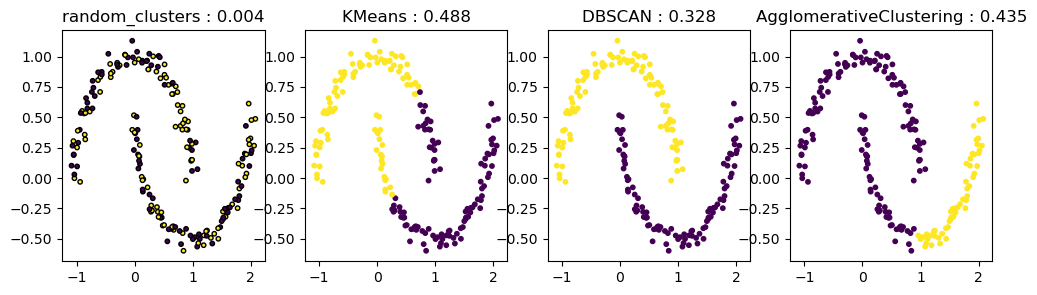

In [106]:
fig, axes = plt.subplots(1,4, figsize=(12, 3))

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
random_clusters # 0, 1을 random하게 150개 추출한 값

#학습이 아닌 random 하게 data를 clustering한 경우
axes[0].scatter(X[:,0], X[:,1], c = random_clusters, marker = 'o', edgecolor = 'black', s = 10)
axes[0].set_title('random_clusters : {}'.format(round(silhouette_score(X, random_clusters),3)))

algorithms = [KMeans(n_clusters=2), DBSCAN(eps = 0.2, min_samples=5, metric='euclidean'), AgglomerativeClustering(n_clusters=2)]

for ax, algorithm in zip(axes[1:], algorithms):
  y_pred = algorithm.fit_predict(X)
  ax.scatter(X[:,0], X[:,1], c=y_pred, marker='o', s=10)

  ax.set_title('{} : {}'.format(algorithm.__class__.__name__, round(silhouette_score(X, y_pred),3)))  # silhouette score

## 결과해석
- 실루엣계수는 참고 지표이지 clustering의 절대적인 지표가 아니다.
- 위의 실루엣 계수를 기준으로 하면, dbscan이 가장 나쁨
- 근데!! 실제로는(그래프 상으로) dbscan이 가장 잘 clustering 했다.
- kmeans, dbscan, agglomerative 중에서 어느 알고리즘이 항상 우수한 clustering algoritm이라고 정의할 수 없다!(데이터마다 다름)
- 일반적으로는 kmeans를 많이 사용하긴 함

<hr>

## 새로운 데이터 셋 
- breast cancer dataset => clustering
- 각 cluster 알고리즘으로 clustering 한 후 양성과 악성종양을 잘 클러스터링 하는지 확인하세용

In [66]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

In [67]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
